<a href="https://colab.research.google.com/github/hasanalaniIT/music_recommendation_app_using_kmeans/blob/master/music_recommendation_app_using_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Music recommendation app using kmeans 
# Data mining final project 
# By: Hasan Alani //B1905.090005

[Google Collab Link](https://colab.research.google.com/drive/1TgEGJk6A_kSswGcjGb93x3lgjxOAcv6b?usp=sharing)

# Import all python libraries and packages to use

In [ ]:
!pip install spotipy

In [ ]:
import spotipy
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline


from datetime import datetime
from collections import defaultdict

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.spatial.distance import cdist

from spotipy.oauth2 import SpotifyClientCredentials


# **Import and read the data**

In [ ]:
music_dataset = pd.read_csv("music_data.csv")

In [ ]:
music_dataset.info()
music_dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


In [ ]:
# Set music features or columns we are going to use 
music_features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
       'liveness', 'loudness', 'speechiness', 'tempo', 'valence','duration_ms','explicit','key','mode','year', 'popularity']

new_slected_data = music_dataset[music_features]

# Set the colors to use for data visualization
colors = ['red', 'blue', 'green', 'purple', 'orange',"cyan", "yellow", "white"]




In [ ]:
def elbow(dataset, max_clusters):
    """
    Find the optimal number of clusters for the given dataset using the elbow method.
    
    Parameters
    ----------
    dataset : The dataset to cluster
    max_clusters : int
        The maximum number of clusters to consider.
    Returns
    -------
    optimal_clusters : int
    The optimal number of clusters.
    """
    clustering_quality = []

    k_range = range(1, max_clusters+1)
    dataset = dataset.select_dtypes(np.number)

    for k in k_range:
        kmeans = KMeans(n_clusters=k)

        kmeans.fit(dataset)

        quality = kmeans.inertia_

        clustering_quality.append(quality)

    plt.plot(k_range, clustering_quality)
    plt.xlabel('Number of clusters')
    plt.ylabel('Clustering quality')
    plt.show()
    
    optimal_index = clustering_quality.index(min(clustering_quality))
    
    return optimal_index + 1


# Using the silhouette method to see the optimal clustering point

In [ ]:
from sklearn.metrics import silhouette_score

def silhouette(dataset):

  # Create an empty list to store the silhouette scores for each value of k
  silhouette_scores = []

  # Iterate over a range of values for k
  for k in range(2, 22):
    # Create a k-means model with the current value of k
    kmeans = KMeans(n_clusters=k)
    # Fit the model to the data
    kmeans.fit(dataset)
    # Calculate the silhouette score for the model
    score = silhouette_score(dataset, kmeans.labels_)
    # Add the score to the list
    silhouette_scores.append(score)

  # Plot the silhouette scores
  plt.plot(range(2, 22), silhouette_scores)
  plt.xlabel("Number of clusters")
  plt.ylabel("Silhouette score")
  plt.show()


In [ ]:
silhouette(music_dataset[music_features])

array([0.72667631, 0.65275496, 0.29381227, ..., 0.41578453, 0.71457148,
       0.11586138])

# Using the elbow method to see the optimal clustering point

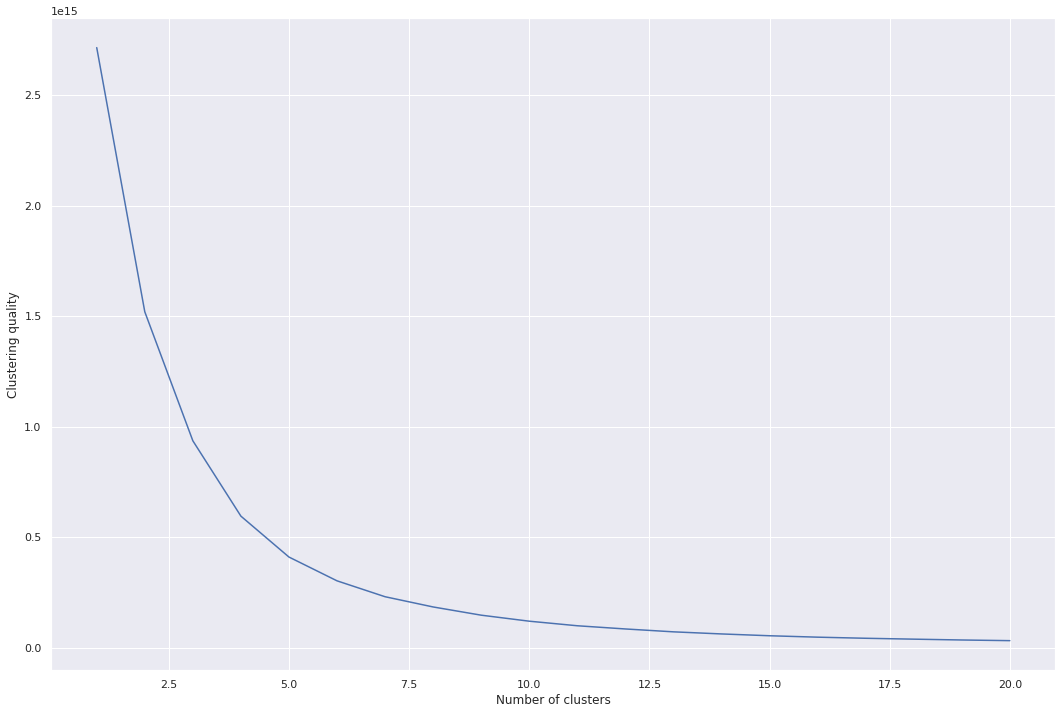

20

In [ ]:
elbow(music_dataset[music_features],20)

# **Dataset Visualizations and Graphs**

# **Clustering Music data with K-Means**

In [ ]:
music_clustering_pipe = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters=6))])

filterd_music_data = music_dataset.select_dtypes(np.number)
music_clustering_pipe.fit(filterd_music_data)
music_cluster_labels = music_clustering_pipe.predict(filterd_music_data)
music_dataset['cluster_label'] = music_cluster_labels

red========acousticness
blue========danceability
green========energy
purple========instrumentalness
orange========liveness
cyan========loudness


/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


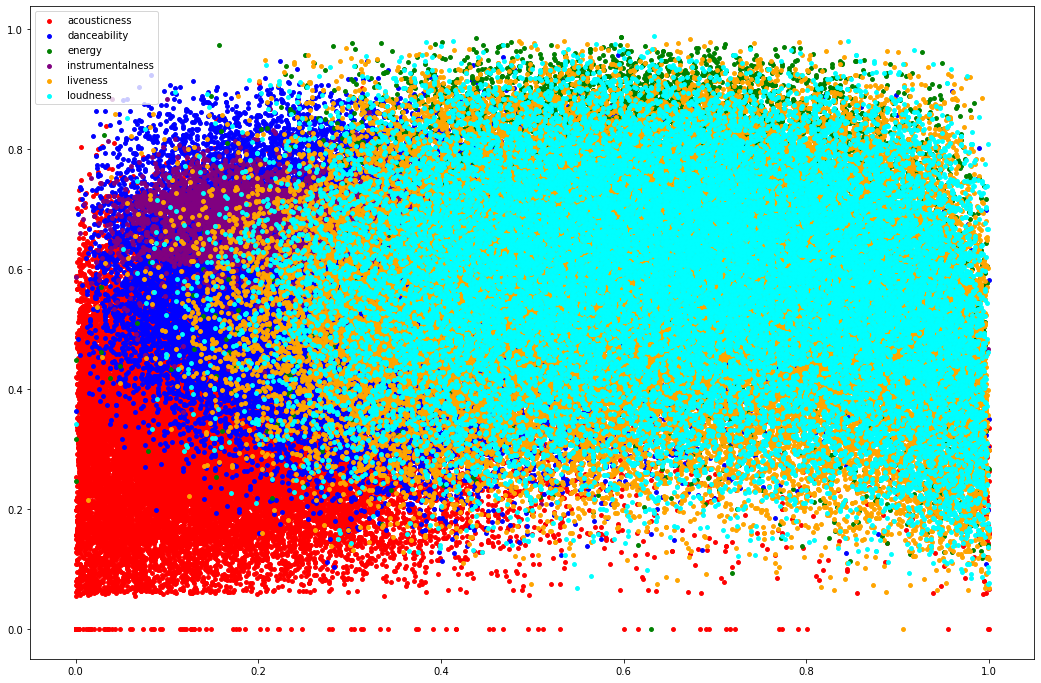

In [ ]:
plt.figure(figsize=(18, 12))
for i, label in enumerate(music_dataset['cluster_label'].unique()):
    cluster_data = music_dataset.loc[music_dataset['cluster_label'] == label, music_features]
    print(f"{colors[i]}========{music_features[i]}")
    plt.scatter(cluster_data['energy'], cluster_data['danceability'], color=colors[i], label=music_features[i],s=15)
plt.legend()

# Music Genres by popularity





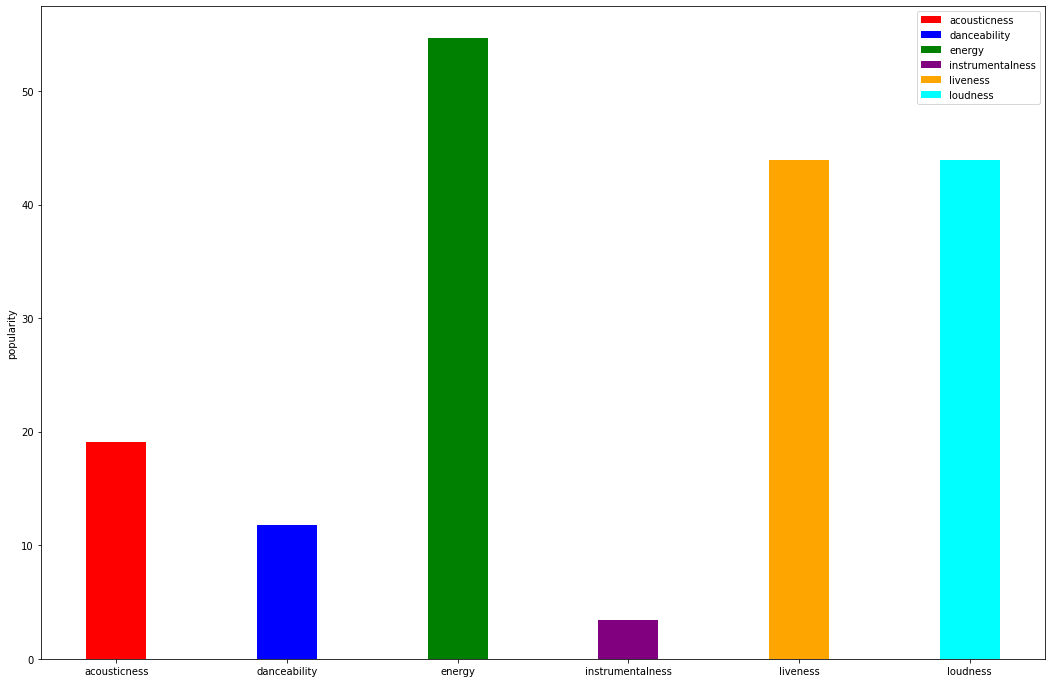

In [ ]:
plt.figure(figsize=(18, 12))
bar_width = 0.35

y_values = range(len(music_dataset['cluster_label'].unique()))
x_values = np.array(music_features)
for i, label in enumerate(music_dataset['cluster_label'].unique()):
    cluster_data = music_dataset.loc[music_dataset['cluster_label'] == label, 'popularity']
    plt.bar(x_values[i], cluster_data.mean(), bar_width, color=colors[i], label=music_features[i])
plt.xticks(y_values, music_features)
plt.ylabel("popularity")
plt.legend()
plt.show()

# **The Music Change Over The Years**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


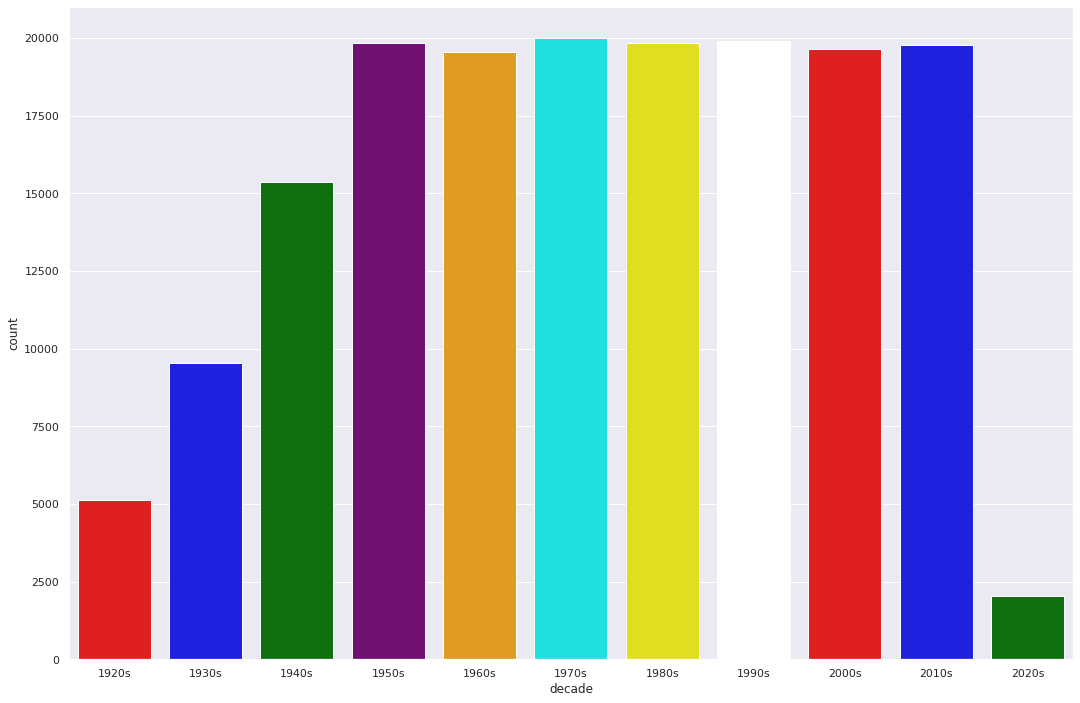

In [ ]:
def get_year_decade(year):
    period_start = int(year/10) * 10
    decade = '{}s'.format(period_start)
    return decade
music_dataset['decade'] = music_dataset['year'].apply(get_year_decade)
sb.set(rc={'figure.figsize':(18 ,12)})
sb.countplot(music_dataset['decade'], palette=colors)

# **Building a music Recommending App**

*   Analyze the data and observe that similar genres and songs tend to have data points that are located close to each other
*   Use this information to recommend similar songs to a user based on the songs they have listened to

*   Install Spotipy, a Python library for accessing the Spotify Web API, using  `pip install spotipy`
*   Create an app on the Spotify Developer's page and save the Client ID and secret key

*   Use Spotipy to fetch data and search for songs in Spotify's catalog



In [ ]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="e9674421faee45c29c3345edacbee881", client_secret="c61acc10253a46caa1662d722034af5e"))

def search_music(name):
    '''
    searches music on spotify based on name and returns the full information of the music to compare it with the music dataset

            Parameters:
                    name (str): the name of the music track
            Returns:
                    pd.DataFrame(music_dict) (pandas): Dataframe of the requested music
    '''
    music_dict = defaultdict()
    spotify_results = sp.search(q= 'track: {}'.format(name), limit=1)
    if spotify_results['tracks']['items'] == []:
        return None

    spotify_results = spotify_results['tracks']['items'][0]
    track_id = spotify_results['id']
    audio_features = sp.audio_features(track_id)[0]
    album = sp.album(spotify_results["album"]["external_urls"]["spotify"])
    datestring = album["release_date"]
    extracted_date = datetime.strptime(datestring, '%Y-%m-%d')
    music_dict['name'] = [name]
    music_dict['year'] = [extracted_date.year]
    music_dict['explicit'] = [int(spotify_results['explicit'])]
    music_dict['duration_ms'] = [spotify_results['duration_ms']]
    music_dict['popularity'] = [spotify_results['popularity']]

  
    for key, value in audio_features.items():
        music_dict[key] = value

    return pd.DataFrame(music_dict)

In [ ]:
search_music("give you up")

,name,year,explicit,duration_ms,popularity,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
0,give you up,1987,0,213573,79,0.721,0.939,8,-11.823,1,...,0.000038,0.108,0.914,113.309,audio_features,4cOdK2wGLETKBW3PvgPWqT,spotify:track:4cOdK2wGLETKBW3PvgPWqT,https://api.spotify.com/v1/tracks/4cOdK2wGLETK...,https://api.spotify.com/v1/audio-analysis/4cOd...,4


In [ ]:
data_columns_number = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']


def get_music_data(music, music_dataset):
    '''
    Returns the music data from the dataset if its not avialable or the name is not correct it uses spotify to search for the music

            Parameters:
                    music (str): the name of the music track
                    music_dataset : the music dataset
            Returns:
                    music_data : Dataset of the requested music
    '''

    try:
        music_data = music_dataset[(music_dataset['name'] == music['name'])].iloc[0]
        return music_data
    
    except IndexError:
        return search_music(music['name'])
        

def get_songs_mean_vector(list_music, music_dataset):
    '''
    Returns centered music data or points in the dataset or the most accurate one

            Parameters:
                    list_music (list): music data list
                    music_dataset : the music dataset
            Returns:
                    np.mean(song_matrix, axis=0) (numpy) : centered music data or points in a numpy matrix
    '''
    music_vectors = []  
    for song in list_music:
        music_data = get_music_data(song, music_dataset)
        if music_data is None:
            print('Warning: {} does not exist in Spotify or in the music dataset'.format(song['name']))
            continue
        music_vector = music_data[data_columns_number].values
        music_vectors.append(music_vector)  
    
    song_matrix = np.array(list(music_vectors))
    return np.mean(song_matrix, axis=0)


def get_defaultdict(music_list):
    '''
    Convert a given list to a dictionary with a default value 

            Parameters:
                    music_list (list): music data list
            Returns:
                    default_dict (dict) : a dictionary with a default value 
    '''  
    default_dict = defaultdict()
    for key in music_list[0].keys():
        default_dict[key] = []
    
    for dictionary in music_list:
        for key, value in dictionary.items():
            default_dict[key].append(value)
            
    return default_dict


def recommender(music_list, music_num=5):
    '''
    Returns recommended songs given the name after looking it up in the dataset

            Parameters:
                    music_list (list): music data list
                    music_num (int): number of recommended music to be displayed
            Returns:
                    recommended_songs (dict) : a dictionary with recommended songs 
    ''' 
    music_information_columns = ['name', 'year', 'artists']
    music_dict = get_defaultdict(music_list)
    
    centered_music = get_songs_mean_vector(music_list, music_dataset)
    scaler_pipe = music_clustering_pipe.steps[0][1]
    scaled_music_dataset = scaler_pipe.transform(music_dataset[data_columns_number])
    scaled_centered_music = scaler_pipe.transform(centered_music.reshape(1, -1))
    distances = cdist(scaled_centered_music, scaled_music_dataset, 'cosine')
    index = list(np.argsort(distances)[:, :music_num][0])
    
    recommended_songs = music_dataset.iloc[index]
    recommended_songs = recommended_songs[~recommended_songs['name'].isin(music_dict['name'])]
    return recommended_songs[music_information_columns].to_dict(orient='records')

In [ ]:
recommender([{'name': 'Starboy'}])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[{'name': 'Fine China', 'year': 2018, 'artists': "['Future', 'Juice WRLD']"},
 {'name': 'Reminder', 'year': 2016, 'artists': "['The Weeknd']"},
 {'name': 'Anaranjado',
  'year': 2020,
  'artists': "['Jowell & Randy', 'J Balvin']"},
 {'name': 'Mr. Right Now (feat. Drake)',
  'year': 2020,
  'artists': "['21 Savage', 'Metro Boomin', 'Drake']"}]